In [2]:
#Dependencies
import gmaps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from math import *
import datetime

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [3]:
# The path to our bus stop locations CSV file
locations_file = "Resources/stops.csv"

# Read our file data into pandas
locations_df = pd.read_csv(locations_file)
locations_df.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN
1,2.0,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418571,-81.760947,NaN,NaN,0,NaN
2,4.0,NaN,EUCLID AV & E 100TH ST,NaN,41.503697,-81.618108,NaN,NaN,0,NaN
3,5.0,NaN,10081 W RIDGEWOOD DR,NaN,41.384506,-81.756317,NaN,NaN,0,NaN
4,14.0,NaN,PROSPECT AV & ONTARIO ST,NaN,41.498030,-81.692012,NaN,NaN,0,NaN


In [4]:
# The path to our bus stop times CSV file
stops_file = "Resources/stop_times.csv"

# Read our file data into pandas
stops_df = pd.read_csv(stops_file)
stops_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,16741667,3:21:00 AM,3:21:00 AM,14507,1,0,0
1,16741667,3:22:00 AM,3:22:00 AM,4568,2,0,0
2,16741667,3:23:00 AM,3:23:00 AM,4522,3,0,0
3,16741667,3:24:00 AM,3:24:00 AM,4378,4,0,0
4,16741667,3:25:00 AM,3:25:00 AM,4556,5,0,0


In [5]:
# merge
bus_data = pd.merge(locations_df, stops_df, on=["stop_id", "stop_id"])
bus_data.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,trip_id,arrival_time,departure_time,stop_sequence,pickup_type,drop_off_type
0,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741990,5:54:00 AM,5:54:00 AM,82,0,0
1,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741993,6:54:00 AM,6:54:00 AM,82,0,0
2,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741995,7:25:00 AM,7:25:00 AM,82,0,0
3,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741997,7:57:00 AM,7:57:00 AM,82,0,0
4,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741999,8:28:00 AM,8:28:00 AM,82,0,0


In [6]:
#groupby stop id to see how many stops 
grouped_bystops = bus_data.groupby(['stop_id', 'stop_lat', 'stop_lon'])
numberstops = grouped_bystops['arrival_time'].nunique()
numberstops

stop_id  stop_lat   stop_lon  
1.0      41.392985  -81.536518     63
2.0      41.418571  -81.760947     72
4.0      41.503697  -81.618108    241
5.0      41.384506  -81.756317    108
14.0     41.498030  -81.692012    370
                                 ... 
50001.0  41.500290  -81.691917    492
60001.0  41.500764  -81.682781    172
60002.0  41.500256  -81.686436    166
60003.0  41.499918  -81.688906    166
60004.0  41.499515  -81.691994    161
Name: arrival_time, Length: 5799, dtype: int64

In [7]:
#numberstops.tolist()

In [8]:
stopnum_df = pd.DataFrame({"Number of Stops":numberstops})
stopnum_df

,,,Number of Stops
stop_id,stop_lat,stop_lon,
1.0,41.392985,-81.536518,63
2.0,41.418571,-81.760947,72
4.0,41.503697,-81.618108,241
5.0,41.384506,-81.756317,108
14.0,41.498030,-81.692012,370
...,...,...,...
50001.0,41.500290,-81.691917,492
60001.0,41.500764,-81.682781,172
60002.0,41.500256,-81.686436,166


In [9]:
# merge stops with lat and long
stopnum_df.reset_index(inplace = True)


In [10]:
# Store lat and long
locations = stopnum_df[['stop_lat','stop_lon']]
stops = stopnum_df[['Number of Stops']].astype(float)

In [11]:
# Plot Heatmap
fig_heat = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, dissipating=False, max_intensity=2, point_radius=.0025)
fig_heat.add_layer(heat_layer)
fig_heat

Figure(layout=FigureLayout(height='420px'))

In [12]:
# plot locations
fig_mark = gmaps.figure()
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig_mark.add_layer(markers)
fig_mark

Figure(layout=FigureLayout(height='420px'))

In [13]:
# Add destination coordinates for Public Square
dest_coords = (41.4997,81.6937)

#stopnum_df["Distance (m)"] = ""

In [14]:
#Drop rows with bad data
clean_trip = stops_df.copy()
clean_trip.dropna(how="any",inplace=True)
clean_trip

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,16741667,3:21:00 AM,3:21:00 AM,14507,1,0,0
1,16741667,3:22:00 AM,3:22:00 AM,4568,2,0,0
2,16741667,3:23:00 AM,3:23:00 AM,4522,3,0,0
3,16741667,3:24:00 AM,3:24:00 AM,4378,4,0,0
4,16741667,3:25:00 AM,3:25:00 AM,4556,5,0,0
...,...,...,...,...,...,...,...
953813,16803524,11:55:00 PM,11:55:00 PM,21023,80,0,0
953814,16803524,11:56:00 PM,11:56:00 PM,14159,81,0,0
953815,16803524,11:56:00 PM,11:56:00 PM,14602,82,0,0
953816,16803524,11:57:00 PM,11:57:00 PM,14603,83,0,0


In [15]:
clean_trip.set_index("arrival_time")
clean_trip.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,16741667,3:21:00 AM,3:21:00 AM,14507,1,0,0
1,16741667,3:22:00 AM,3:22:00 AM,4568,2,0,0
2,16741667,3:23:00 AM,3:23:00 AM,4522,3,0,0
3,16741667,3:24:00 AM,3:24:00 AM,4378,4,0,0
4,16741667,3:25:00 AM,3:25:00 AM,4556,5,0,0


In [16]:
#Convert arrival and departure times into timestamps
clean_trip["arrival_time"] = pd.to_datetime(clean_trip["arrival_time"])
clean_trip["departure_time"] = pd.to_datetime(clean_trip["departure_time"])
clean_trip

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,16741667,2020-09-13 03:21:00,2020-09-13 03:21:00,14507,1,0,0
1,16741667,2020-09-13 03:22:00,2020-09-13 03:22:00,4568,2,0,0
2,16741667,2020-09-13 03:23:00,2020-09-13 03:23:00,4522,3,0,0
3,16741667,2020-09-13 03:24:00,2020-09-13 03:24:00,4378,4,0,0
4,16741667,2020-09-13 03:25:00,2020-09-13 03:25:00,4556,5,0,0
...,...,...,...,...,...,...,...
953813,16803524,2020-09-13 23:55:00,2020-09-13 23:55:00,21023,80,0,0
953814,16803524,2020-09-13 23:56:00,2020-09-13 23:56:00,14159,81,0,0
953815,16803524,2020-09-13 23:56:00,2020-09-13 23:56:00,14602,82,0,0
953816,16803524,2020-09-13 23:57:00,2020-09-13 23:57:00,14603,83,0,0


In [17]:
trip_group = clean_trip.groupby("trip_id").count()
trip_group["min_arr"] = ""
trip_group["max_arr"] = ""
trip_group

,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,min_arr,max_arr
trip_id,,,,,,,,
16723936,18,18,18,18,18,18,,
16723937,18,18,18,18,18,18,,
16723938,18,18,18,18,18,18,,
16723939,18,18,18,18,18,18,,
16723940,23,23,23,23,23,23,,
...,...,...,...,...,...,...,...,...
16811833,51,51,51,51,51,51,,
16811837,16,16,16,16,16,16,,
16811838,16,16,16,16,16,16,,


In [18]:
#Make sure that trips are one way
clean_trip.loc[clean_trip["trip_id"] == 16723936]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
504408,16723936,2020-09-13 09:30:00,2020-09-13 09:30:00,18915,1,0,0
504409,16723936,2020-09-13 09:33:00,2020-09-13 09:33:00,28886,2,0,0
504410,16723936,2020-09-13 09:36:00,2020-09-13 09:36:00,30879,3,0,0
504411,16723936,2020-09-13 09:39:00,2020-09-13 09:39:00,28923,4,0,0
504412,16723936,2020-09-13 09:41:00,2020-09-13 09:41:00,10960,5,0,0
504413,16723936,2020-09-13 09:43:00,2020-09-13 09:43:00,10962,6,0,0
504414,16723936,2020-09-13 09:45:00,2020-09-13 09:45:00,10963,7,0,0
504415,16723936,2020-09-13 09:46:00,2020-09-13 09:46:00,10954,8,0,0
504416,16723936,2020-09-13 09:48:00,2020-09-13 09:48:00,10937,9,0,0
504417,16723936,2020-09-13 09:49:00,2020-09-13 09:49:00,10936,10,0,0


In [19]:
trip_group.reset_index(inplace=True)
#trip_group.head()

min_trips = clean_trip.groupby(["trip_id"]).agg({"arrival_time":["min","max"]})
min_trips

arrival_time                    
                         min                 max
trip_id                                         
16723936 2020-09-13 09:30:00 2020-09-13 09:59:00
16723937 2020-09-13 09:52:00 2020-09-13 10:24:00
16723938 2020-09-13 09:22:00 2020-09-13 09:54:00
16723939 2020-09-13 21:22:00 2020-09-13 21:54:00
16723940 2020-09-13 17:05:00 2020-09-13 17:45:00
...                      ...                 ...
16811833 2020-09-13 17:40:00 2020-09-13 18:52:00
16811837 2020-09-13 16:35:00 2020-09-13 17:16:00
16811838 2020-09-13 18:05:00 2020-09-13 18:46:00
16811842 2020-09-13 16:40:00 2020-09-13 17:25:00
16811843 2020-09-13 18:08:00 2020-09-13 18:50:00

[16057 rows x 2 columns]

In [20]:
min_trips["duration"] = min_trips["arrival_time"]["max"] - min_trips["arrival_time"]["min"]

min_trips

arrival_time                     duration
                         min                 max         
trip_id                                                  
16723936 2020-09-13 09:30:00 2020-09-13 09:59:00 00:29:00
16723937 2020-09-13 09:52:00 2020-09-13 10:24:00 00:32:00
16723938 2020-09-13 09:22:00 2020-09-13 09:54:00 00:32:00
16723939 2020-09-13 21:22:00 2020-09-13 21:54:00 00:32:00
16723940 2020-09-13 17:05:00 2020-09-13 17:45:00 00:40:00
...                      ...                 ...      ...
16811833 2020-09-13 17:40:00 2020-09-13 18:52:00 01:12:00
16811837 2020-09-13 16:35:00 2020-09-13 17:16:00 00:41:00
16811838 2020-09-13 18:05:00 2020-09-13 18:46:00 00:41:00
16811842 2020-09-13 16:40:00 2020-09-13 17:25:00 00:45:00
16811843 2020-09-13 18:08:00 2020-09-13 18:50:00 00:42:00

[16057 rows x 3 columns]

In [21]:
#Get longest trips
longest_trip = min_trips["duration"].max()

min_trips.loc[min_trips["duration"] == longest_trip]

arrival_time                     duration
                         min                 max         
trip_id                                                  
16741726 2020-09-13 16:32:00 2020-09-13 18:11:00 01:39:00
16790314 2020-09-13 16:32:00 2020-09-13 18:11:00 01:39:00

In [22]:
bus_data.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,trip_id,arrival_time,departure_time,stop_sequence,pickup_type,drop_off_type
0,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741990,5:54:00 AM,5:54:00 AM,82,0,0
1,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741993,6:54:00 AM,6:54:00 AM,82,0,0
2,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741995,7:25:00 AM,7:25:00 AM,82,0,0
3,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741997,7:57:00 AM,7:57:00 AM,82,0,0
4,1.0,NaN,COLUMBUS ST & BROADWAY,NaN,41.392985,-81.536518,NaN,NaN,0,NaN,16741999,8:28:00 AM,8:28:00 AM,82,0,0


In [23]:
lngtripmap = bus_data.loc[bus_data["trip_id"] == 16741726]

lngtripmap = lngtripmap[["stop_id","stop_name","stop_lat","stop_lon","trip_id","arrival_time","departure_time","stop_sequence"]]

In [24]:
lngtripmap.sort_values(by="stop_sequence")

,stop_id,stop_name,stop_lat,stop_lon,trip_id,arrival_time,departure_time,stop_sequence
917371,14817.0,31200 DIAMOND PKWY (LAYOVER),41.353859,-81.452560,16741726,4:32:00 PM,4:32:00 PM,1
917501,14818.0,DIAMOND PKWY & VICTORY PKWY,41.353834,-81.458586,16741726,4:33:00 PM,4:33:00 PM,2
917265,14816.0,PETTIBONE RD & COCHRAN RD,41.356818,-81.462647,16741726,4:34:00 PM,4:34:00 PM,3
917661,14820.0,7905 COCHRAN RD,41.357810,-81.463618,16741726,4:35:00 PM,4:35:00 PM,4
916911,14813.0,COCHRAN RD & EMERALD VALLEY PKWY,41.359899,-81.465072,16741726,4:35:00 PM,4:35:00 PM,5
...,...,...,...,...,...,...,...,...
251451,4558.0,EUCLID AV & STRATHMORE AV,41.535886,-81.576279,16741726,6:07:00 PM,6:07:00 PM,109
248893,4535.0,EUCLID AV & NORTHFIELD RD,41.534315,-81.577877,16741726,6:08:00 PM,6:08:00 PM,110
254692,4579.0,EUCLID AV & WYMORE AV,41.532488,-81.579850,16741726,6:09:00 PM,6:09:00 PM,111
238901,4397.0,EUCLID AV & DOAN AV,41.530965,-81.581512,16741726,6:10:00 PM,6:10:00 PM,112


In [25]:
#Diplay route with longest commute time
lngrte_fig = gmaps.figure()

lngtripmap.reset_index(inplace=True)
lngrte = lngtripmap[["stop_lat","stop_lon"]]
lngrte_stop_name = lngtripmap["stop_name"]
lngrte_arr_time = lngtripmap["arrival_time"]

# info_box_template = """
# <dl>
# <dt>Arrival Time</dt><dd>{lngrte_arr_time}</dd>
# </dl>
# """

# times = [info_box_template.format(**lngrte_arr_time) for time in lngrte_arr_time]


lngrte_layer = gmaps.marker_layer(lngrte,hover_text=lngrte_stop_name,info_box_content=lngrte_arr_time)
lngrte_fig.add_layer(lngrte_layer)
lngrte_fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#Get trip distances
distance_df = bus_data[["stop_id","stop_name","stop_lat","stop_lon","trip_id","stop_sequence"]]
distance_df.head()


,stop_id,stop_name,stop_lat,stop_lon,trip_id,stop_sequence
0,1.0,COLUMBUS ST & BROADWAY,41.392985,-81.536518,16741990,82
1,1.0,COLUMBUS ST & BROADWAY,41.392985,-81.536518,16741993,82
2,1.0,COLUMBUS ST & BROADWAY,41.392985,-81.536518,16741995,82
3,1.0,COLUMBUS ST & BROADWAY,41.392985,-81.536518,16741997,82
4,1.0,COLUMBUS ST & BROADWAY,41.392985,-81.536518,16741999,82


In [27]:
#Get all last stops by trip
last_stop = distance_df.groupby(["trip_id"],as_index=False).agg({"stop_sequence":["max"]})

last_stop.columns = last_stop.columns.get_level_values(0)

stop_dist_df = pd.merge(last_stop,distance_df,on=["trip_id","stop_sequence"])
stop_dist_df


,trip_id,stop_sequence,stop_id,stop_name,stop_lat,stop_lon
0,16723936,18,8934.0,GREEN RD STATION,41.478529,-81.518187
1,16723937,18,18915.0,TOWER CITY STATION TRACK 10 EAST,41.497472,-81.693581
2,16723938,18,18915.0,TOWER CITY STATION TRACK 10 EAST,41.497472,-81.693581
3,16723939,18,18915.0,TOWER CITY STATION TRACK 10 EAST,41.497472,-81.693581
4,16723940,23,10933.0,VAN AKEN & WARRENSVILLE STN,41.465930,-81.538026
...,...,...,...,...,...,...
16818,16811833,51,9742.0,LAUREL SQUARE SHOPPING CTR,41.227828,-81.840365
16819,16811837,16,10919.0,WESTLAKE PARK-N-RIDE,41.475942,-81.896807
16820,16811838,16,10919.0,WESTLAKE PARK-N-RIDE,41.475942,-81.896807
16821,16811842,19,9731.0,STRONGSVILLE PARK-N-RIDE #2,41.339026,-81.827038


In [28]:
#Get all first stops by trip
first_stop = distance_df.groupby(["trip_id"],as_index=False).agg({"stop_sequence":["min"]})

first_stop.columns = first_stop.columns.get_level_values(0)

start_dist_df = pd.merge(first_stop,distance_df,on=["trip_id","stop_sequence"])
start_dist_df

,trip_id,stop_sequence,stop_id,stop_name,stop_lat,stop_lon
0,16723936,1,18915.0,TOWER CITY STATION TRACK 10 EAST,41.497472,-81.693581
1,16723937,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991
2,16723938,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991
3,16723939,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991
4,16723940,1,28984.0,SOUTH HARBOR STATION,41.509269,-81.688290
...,...,...,...,...,...,...
16818,16811833,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860
16819,16811837,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867
16820,16811838,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867
16821,16811842,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860


In [29]:
#Get distances for start and end stops using Haversine formula found on Stack Overflow
def haversine_np(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    mi = 3956 * c
    return mi

In [30]:
#Put distances for each trip into new column
start_dist_df["Distance (mi)"] = haversine_np(start_dist_df["stop_lon"],start_dist_df["stop_lat"],stop_dist_df["stop_lon"],stop_dist_df["stop_lat"])
start_dist_df

,trip_id,stop_sequence,stop_id,stop_name,stop_lat,stop_lon,Distance (mi)
0,16723936,1,18915.0,TOWER CITY STATION TRACK 10 EAST,41.497472,-81.693581,9.165423
1,16723937,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863
2,16723938,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863
3,16723939,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863
4,16723940,1,28984.0,SOUTH HARBOR STATION,41.509269,-81.688290,8.328070
...,...,...,...,...,...,...,...
16818,16811833,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860,20.650430
16819,16811837,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867,11.598582
16820,16811838,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867,11.598582
16821,16811842,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860,13.618302


In [31]:
min_trips.columns = min_trips.columns.get_level_values(0)
commute_data = pd.merge(start_dist_df,min_trips,on="trip_id")
commute_data

,trip_id,stop_sequence,stop_id,stop_name,stop_lat,stop_lon,Distance (mi),arrival_time,arrival_time,duration
0,16723936,1,18915.0,TOWER CITY STATION TRACK 10 EAST,41.497472,-81.693581,9.165423,2020-09-13 09:30:00,2020-09-13 09:59:00,00:29:00
1,16723937,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863,2020-09-13 09:52:00,2020-09-13 10:24:00,00:32:00
2,16723938,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863,2020-09-13 09:22:00,2020-09-13 09:54:00,00:32:00
3,16723939,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863,2020-09-13 21:22:00,2020-09-13 21:54:00,00:32:00
4,16723940,1,28984.0,SOUTH HARBOR STATION,41.509269,-81.688290,8.328070,2020-09-13 17:05:00,2020-09-13 17:45:00,00:40:00
...,...,...,...,...,...,...,...,...,...,...
16052,16811833,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860,20.650430,2020-09-13 17:40:00,2020-09-13 18:52:00,01:12:00
16053,16811837,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867,11.598582,2020-09-13 16:35:00,2020-09-13 17:16:00,00:41:00
16054,16811838,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867,11.598582,2020-09-13 18:05:00,2020-09-13 18:46:00,00:41:00
16055,16811842,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860,13.618302,2020-09-13 16:40:00,2020-09-13 17:25:00,00:45:00


In [32]:
commute_data["Duration (minutes)"] = commute_data["duration"].dt.seconds / 60
commute_data

,trip_id,stop_sequence,stop_id,stop_name,stop_lat,stop_lon,Distance (mi),arrival_time,arrival_time,duration,Duration (minutes)
0,16723936,1,18915.0,TOWER CITY STATION TRACK 10 EAST,41.497472,-81.693581,9.165423,2020-09-13 09:30:00,2020-09-13 09:59:00,00:29:00,29.0
1,16723937,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863,2020-09-13 09:52:00,2020-09-13 10:24:00,00:32:00,32.0
2,16723938,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863,2020-09-13 09:22:00,2020-09-13 09:54:00,00:32:00,32.0
3,16723939,1,10932.0,VAN AKEN & WARRENSVILLE STN,41.465969,-81.537991,8.336863,2020-09-13 21:22:00,2020-09-13 21:54:00,00:32:00,32.0
4,16723940,1,28984.0,SOUTH HARBOR STATION,41.509269,-81.688290,8.328070,2020-09-13 17:05:00,2020-09-13 17:45:00,00:40:00,40.0
...,...,...,...,...,...,...,...,...,...,...,...
16052,16811833,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860,20.650430,2020-09-13 17:40:00,2020-09-13 18:52:00,01:12:00,72.0
16053,16811837,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867,11.598582,2020-09-13 16:35:00,2020-09-13 17:16:00,00:41:00,41.0
16054,16811838,1,14378.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #2,41.499997,-81.674867,11.598582,2020-09-13 18:05:00,2020-09-13 18:46:00,00:41:00,41.0
16055,16811842,1,14380.0,STEPHANIE TUBBS JONES TRANSIT CENTER STOP #5,41.499899,-81.674860,13.618302,2020-09-13 16:40:00,2020-09-13 17:25:00,00:45:00,45.0


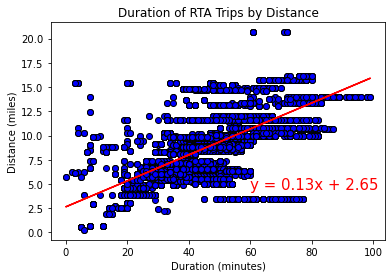

The r-squared value is 0.3232831729144682.


<Figure size 432x288 with 0 Axes>

In [33]:
#Plot distance versus duration of trip
x_axis = commute_data["Duration (minutes)"].astype(float)
y_axis = commute_data["Distance (mi)"].astype(float)

plt.scatter(x_axis,y_axis,color="b",edgecolors="black")

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"-r")
plt.xlabel("Duration (minutes)")
plt.ylabel("Distance (miles)")
plt.title("Duration of RTA Trips by Distance")
plt.annotate(line_eq,(60,4.5),fontsize=15,color="red")

plt.show()
plt.savefig("Results/commute_times.png")

print(f"The r-squared value is {rvalue**2}.")

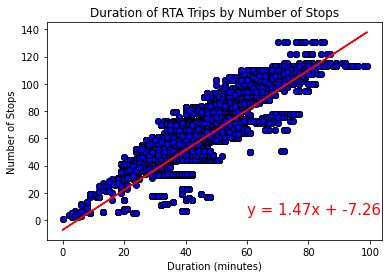

The r-squared value is 0.590140476264753.


<Figure size 432x288 with 0 Axes>

In [34]:
x_axis = commute_data["Duration (minutes)"].astype(float)
y_axis = trip_group["stop_sequence"]

plt.scatter(x_axis,y_axis,color="b",edgecolors="black")

(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"-r")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Stops")
plt.title("Duration of RTA Trips by Number of Stops")
plt.annotate(line_eq,(60,4.5),fontsize=15,color="red")

plt.show()
plt.savefig("Results/commute_numstops.png")

print(f"The r-squared value is {rvalue**2}.")